# Clay Young Lab 4 Report

In [53]:
#Neccessary Libraries
import numpy as np
import matplotlib.pyplot as plt

# LAB 4: Data Conversion Figures of Merit

## 1.) A 200mV rms value sinusoidal signal is applied to and ideal 12 bits ADC. The full range peak-to-peak voltage of the ADC is 1.2V.

a. Find the SNR of the ADC output using Python and provide plots.

SNR Ideal: 74.0 dB
SNR Actual: 67.46787486224656 dB


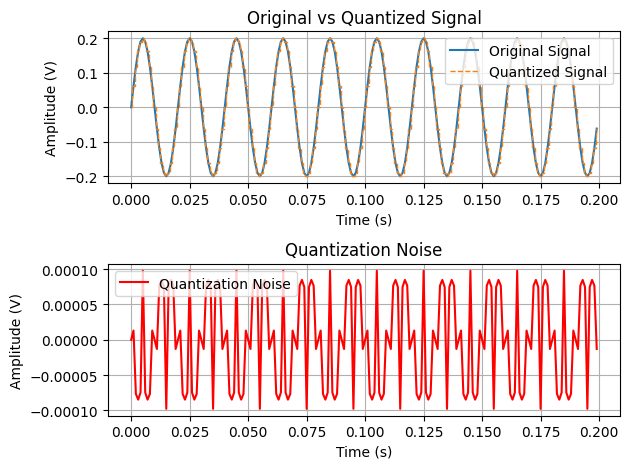

In [54]:
import numpy as np
import matplotlib.pyplot as plt

Vin_rms = 0.2 # RMS value of the input signal
N = 12 # number of bits in the ADC
Vpp = 1.2 # peak-to-peak voltage of the ADC

Vfs_rms = Vpp / (2 * np.sqrt(2)) #Computing full-scale RMS voltage

SNR_ideal = 6.02 * N + 1.76 #Computing ideal SNR in dB

SNR_actual = SNR_ideal-20 * np.log10(Vfs_rms/Vin_rms) #Computing actual SNR in dB

print("SNR Ideal:", SNR_ideal, "dB")
print("SNR Actual:", SNR_actual, "dB")

fs = 1000 # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False) # Time vector
f_sig =50 # Signal Frequency

signal = Vin_rms * np.sin(2 * np.pi * f_sig * t) #Generating the signal

# Quantizing the signal
quantization_levels = 2**N
quantized_signal = np.round(signal / (Vpp / quantization_levels)) * (Vpp / quantization_levels)

# Computing quantization noise
quantization_noise = quantized_signal- signal

# Original and quantized signals
plt.subplot(2, 1, 1)
plt.plot(t[:200], signal[:200], label="Original Signal", linewidth=1.5)
plt.step(t[:200], quantized_signal[:200], where='mid', label="Quantized Signal", linestyle="--", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Original vs Quantized Signal")
plt.legend()
plt.grid()

# Quantization noise
plt.subplot(2, 1, 2)
plt.plot(t[:200], quantization_noise[:200], label="Quantization Noise", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Quantization Noise")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

b. Now the input sinusoidal is full range but comes with an additive Gaussian noise
with standard deviation of 0.5 V. What is the SNR of the input signal? What is the
SNR of the ADC output bits?

In [55]:
sigma_noise = 0.5 # Standard deviation of Gaussian noise

P_signal = Vfs_rms**2 # Power of the signal

P_noise = sigma_noise**2 # Power of the noise

SNR_input = 10 * np.log10(P_signal / P_noise) # Computing SNR of the input signal

print("SNR Input:", SNR_input, "dB")

P_quantization = (Vfs_rms**2) / (3 * (2**(2*N)))

P_total_noise = P_quantization + P_noise

SNR_ADC = 10 * np.log10(P_signal / P_total_noise) # Compute ADC output SNR

print("SNR ADC:", SNR_ADC, "dB")


SNR Input: -1.4266750356873168 dB
SNR ADC: -1.4266750978136402 dB


c. Repeat b assuming that the noise added to the sinewave is uniformly distributed
with peak-to-peak value of 1V.

In [56]:
# Given uniform noise peak-to-peak value
V_noise_pp = 1.0  # V

# Compute noise power for uniform distribution
P_noise_uniform = (V_noise_pp**2) / 12

# Compute input SNR for uniform noise
SNR_input_uniform = 10 * np.log10(P_signal / P_noise_uniform)

print("SNR Input (Uniform Noise):", SNR_input_uniform, "dB")

# Compute total noise power at ADC output (quantization + uniform noise)
P_total_noise_uniform = P_quantization + P_noise_uniform

# Compute ADC output SNR for uniform noise
SNR_ADC_uniform = 10 * np.log10(P_signal / P_total_noise_uniform)

print("SNR ADC (Uniform Noise):", SNR_ADC_uniform, "dB")

SNR Input (Uniform Noise): 3.3445375115093072 dB
SNR ADC (Uniform Noise): 3.344537325130339 dB


## 2.) Assume that an ADC uses an oversampling factor K=fs/(2B), where fs is the sampling rate and B is the signal bandwidth. Then K=1 is Nyquist rate and K>1 means oversampling. The quantization noise variance is σe=Δ²/12 as we defined in class for the additive noise model. As you may recall also, this noise is uniformly distributed and white, i.e. is flat in the frequency range [0 fs/2]. Then the noise power spectral density will be σe/fs, so the integral in the range [-fs/2 fs/2] is σe. Now assume that a perfect low-pass filter is used that selects the signal bandwidth B and rejects all the out of band noise. Find an expression for the output SNR of this oversampled ADC+low-pass filter combinatio

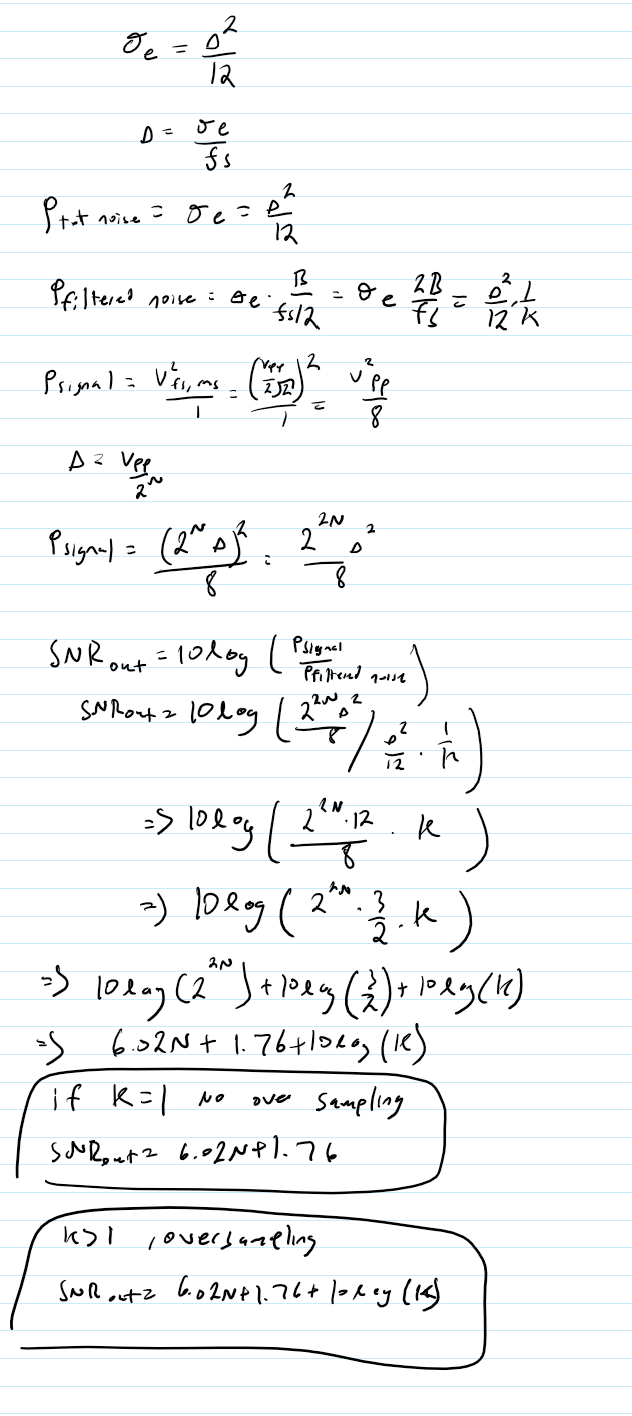

## 3. A 3-bit D/A converter was designed for an ideal LSB level of 100 mV.

The following output voltages levels were measured for the real D/A for thee codes 000 to 111 respectively:

-0.01V 0.105V 0.195V 0.28V 0.37V 0.48V 0.6V 0.75V

a. Find the offset & full-scale error in units of LSBs

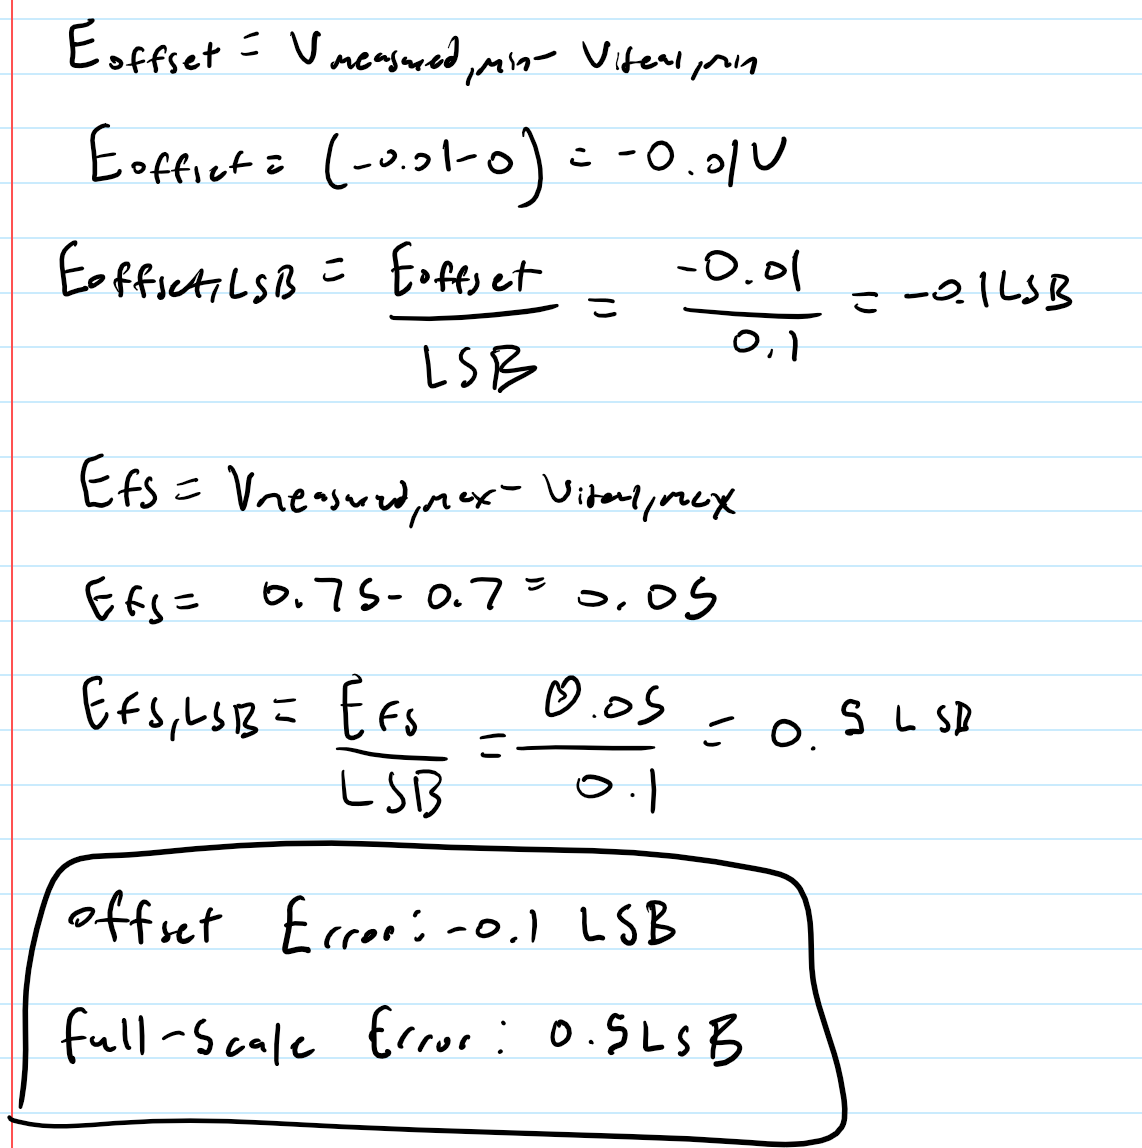

b. Find the end-point ideal & actual gain in LSB/code and compute the gain error in
LSB/code

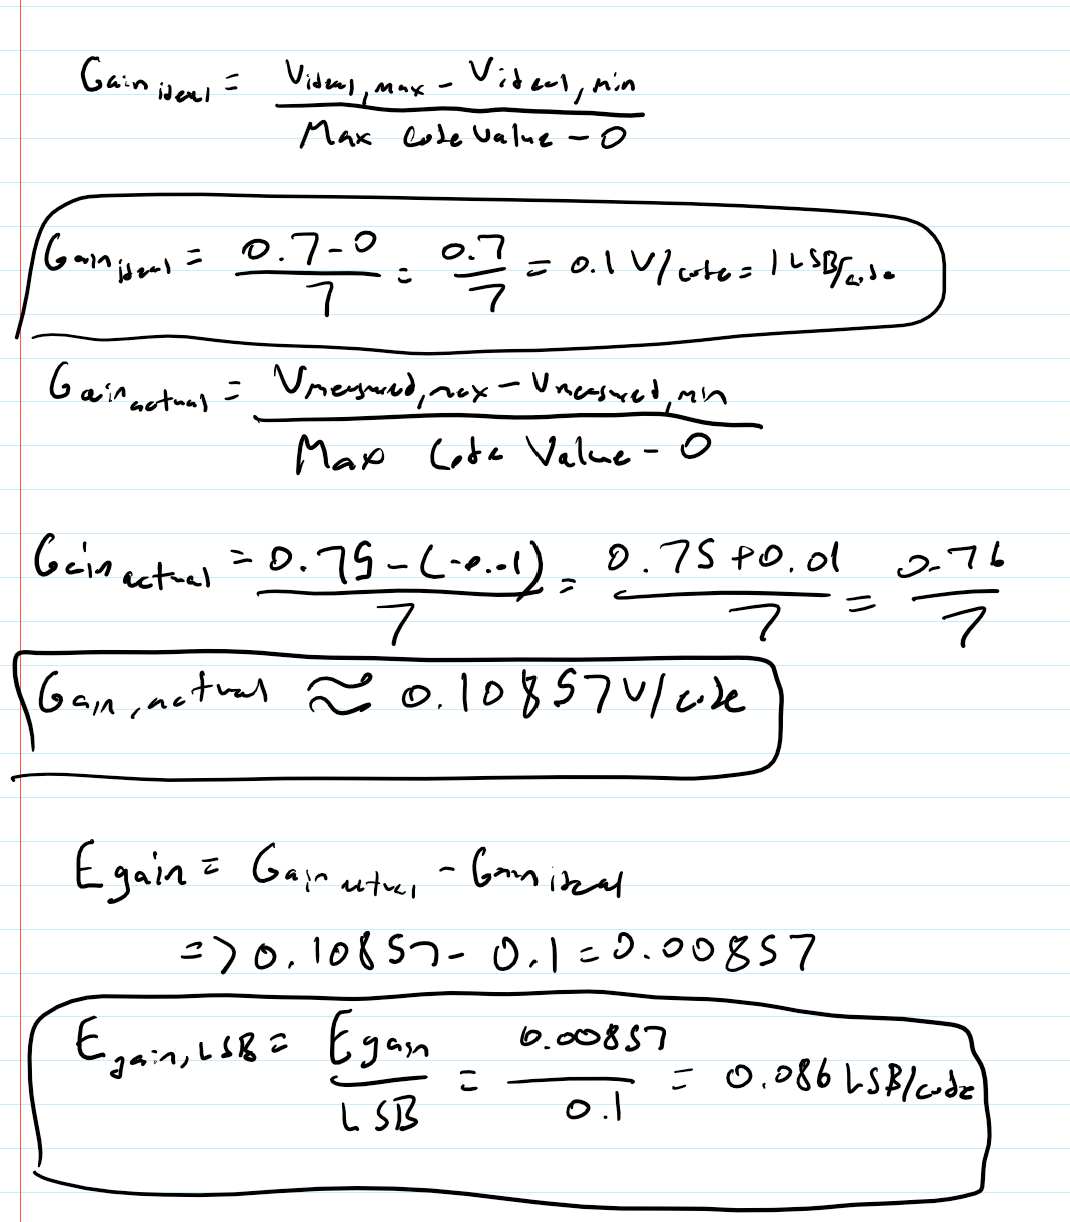

c. Find the end point corrected codes and compute DNL & INL for all the codes.

In [57]:
# Given measured DAC output levels (V)
measured_values = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])

# Ideal LSB step size (V)
LSB = 0.1

# Compute ideal DAC output levels (V)
ideal_values = np.array([k * LSB for k in range(8)])

# Compute DNL
step_sizes = np.diff(measured_values)  # Measured step sizes
DNL = (step_sizes / LSB) - 1  # Differential Nonlinearity

# Compute INL
INL = (measured_values - ideal_values) / LSB  # Integral Nonlinearity

# Display results
print("Ideal DAC Output Levels (V):", ideal_values)
print("DNL:", DNL)

formatted_INL = [f"{value:.2f}" for value in INL]
print("INL:", formatted_INL)


Ideal DAC Output Levels (V): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]
DNL: [ 0.15 -0.1  -0.15 -0.1   0.1   0.2   0.5 ]
INL: ['-0.10', '0.05', '-0.05', '-0.20', '-0.30', '-0.20', '-0.00', '0.50']


d. What is the maximum DNL and INL?

In [58]:
max_DNL = np.max(np.abs(DNL))  # Maximum absolute value of DNL
max_INL = np.max(np.abs(INL))  # Maximum absolute value of INL

print(f"Maximum DNL: {max_DNL:.3f} LSB")  # Format with 3 decimal places
print(f"Maximum INL: {max_INL:.3f} LSB")  # Format with 3 decimal places

Maximum DNL: 0.500 LSB
Maximum INL: 0.500 LSB


Hint: I suggest you take a look at the following article in case of you have questions for this problem:
http://focus.ti.com/lit/an/slaa013/slaa013.pdf#search=%22understanding%20data%20converters%20%22

## 4.) A ramp histogram is used to characterize a 4-bit ADC, the following vector is found: 43 115 85 101 122 170 75 146 125 60 95 95 115 40 120 242

a. Calculate the DNL and INL

In [59]:
ramp_histogram = [43, 115, 85, 101, 122, 170, 75, 146, 125, 60, 95, 95, 115, 40, 120, 242]

N = 4 #Number of bits present

#Finding ideal bin_width for a N bit bin_width
ideal_bin_width = np.sum(ramp_histogram)/ (2**N)

#Calculating DNL
DNL = (np.array(ramp_histogram)- ideal_bin_width) / (ideal_bin_width)

#Calculating INL
INL = np.cumsum(DNL)

print("DNL: ", DNL)
print("INL: ", INL)

DNL:  [-0.60663236  0.05202973 -0.22241281 -0.07604345  0.11606632  0.55517439
 -0.31389365  0.33562035  0.14351058 -0.45111492 -0.13093196 -0.13093196
  0.05202973 -0.63407662  0.09777015  1.21383648]
INL:  [-6.06632361e-01 -5.54602630e-01 -7.77015437e-01 -8.53058891e-01
 -7.36992567e-01 -1.81818182e-01 -4.95711835e-01 -1.60091481e-01
 -1.65809034e-02 -4.67695826e-01 -5.98627787e-01 -7.29559748e-01
 -6.77530017e-01 -1.31160663e+00 -1.21383648e+00  2.22044605e-16]


b. What are the peak DNL and INL values?

In [60]:
peak_DNL = np.max(np.abs(DNL))
peak_INL = np.max(np.abs(INL))

print("Peak DNL:", peak_DNL)
print("Peak INL:", peak_INL)

Peak DNL: 1.2138364779874213
Peak INL: 1.3116066323613491


c. Is this ADC monotonic?

In [61]:
#Checking to see is all DNL is greater then -1 b/c
#if not than the ADC is non-montonic

if np.all(DNL >= -1):
    print("The ADC is monotonic.")
else:
    print("The ADC is non-monotonic.")

The ADC is monotonic.


Hint: Recall that you use as a reference the straight line that connects the end points of
the transfer function provided by the histogram. This is needed to eliminate offset errors
and full-scale errors. There is a trivial way to eliminate these errors. How?

## 5.) The end point DNL for a 3-bit ADC is measured to be:
DNL: 0 -0.5 0 +0.5 -1 +0.5 +0.5 0 (all numbers in terms of LSB)

The ADC exhibits offset and full-scale error:

Offset error = +0.5LSB

Full scale error = +0.5LSB

a. Find the INL for this ADC

In [62]:
DNL = [0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0]

offset_error = 0.5
full_scale_error = 0.5

DNL[0] = DNL[0] + offset_error

#Calculating INL
INL = np.cumsum(DNL)

#Adjusting for full scale error
INL = INL - INL[-1] + full_scale_error

print("INL for the 3-bit ADC is ", INL)

INL for the 3-bit ADC is  [ 0.5  0.   0.   0.5 -0.5  0.   0.5  0.5]


b. Plot the transfer curve of this ADC in Python.

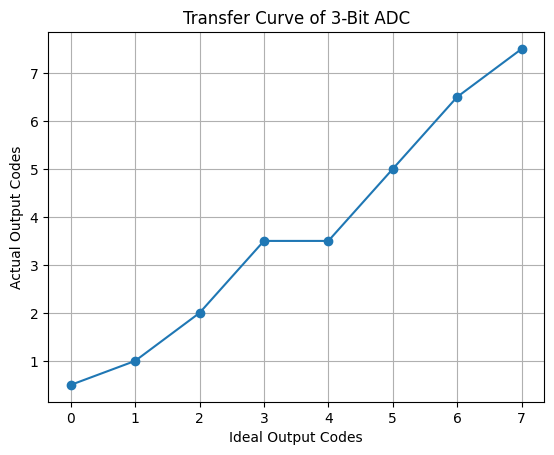

In [63]:
N = 3 #Number of bits present

ideal_output_codes = np.arange(0, 2**N)
actual_output_codes = ideal_output_codes + INL

plt.plot(ideal_output_codes, actual_output_codes, marker='o')
plt.xlabel('Ideal Output Codes')
plt.ylabel('Actual Output Codes')
plt.title('Transfer Curve of 3-Bit ADC')
plt.grid(True)
plt.show()

## 6.) Consider the preamplifier/latch topology below.  

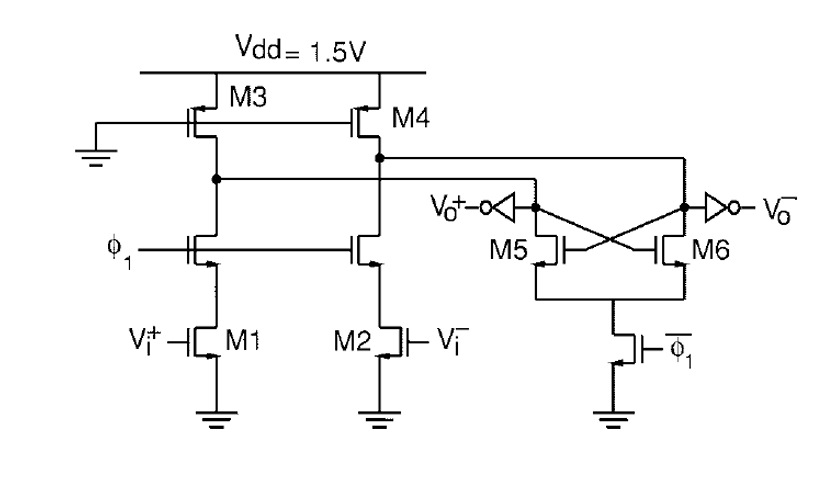

a.  Please explain the circuit dynamics for 1
 
 and

 1
 . Clearly indicate the region of operation of
the transistors (i.e., OFF, triode, saturation)

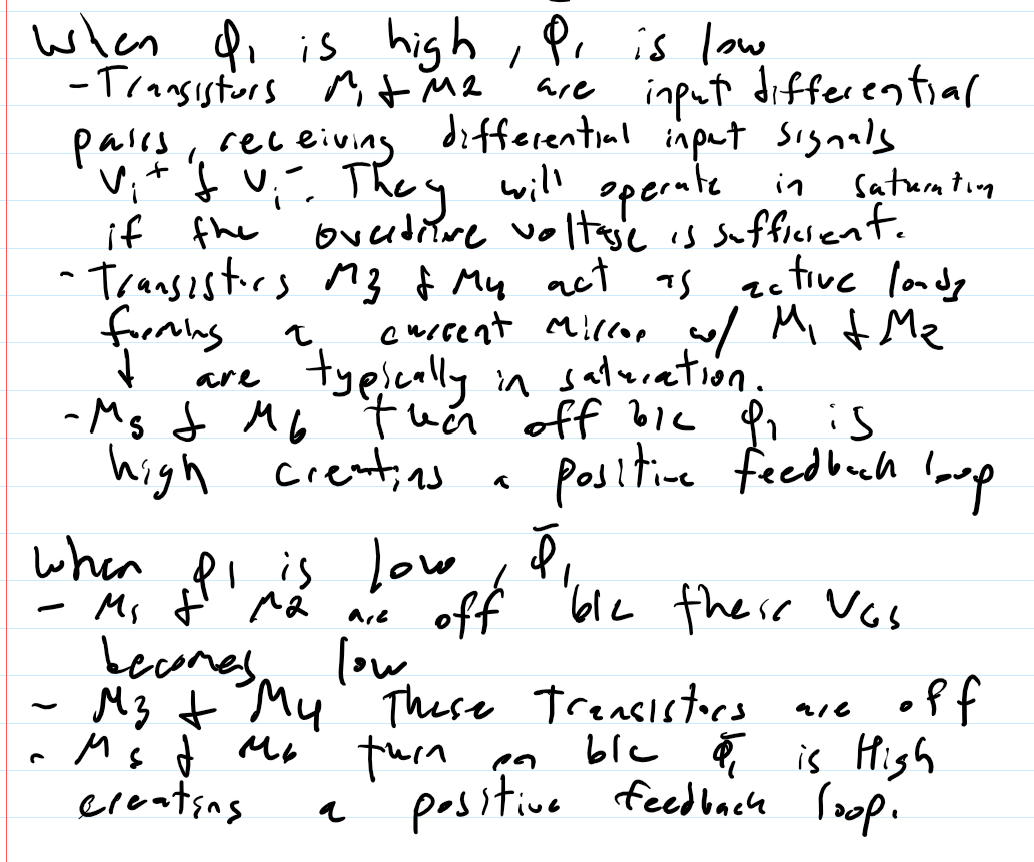

b. Find an expression of the input vs the output that takes into account the gains and the positive
regeneration of the circuit.

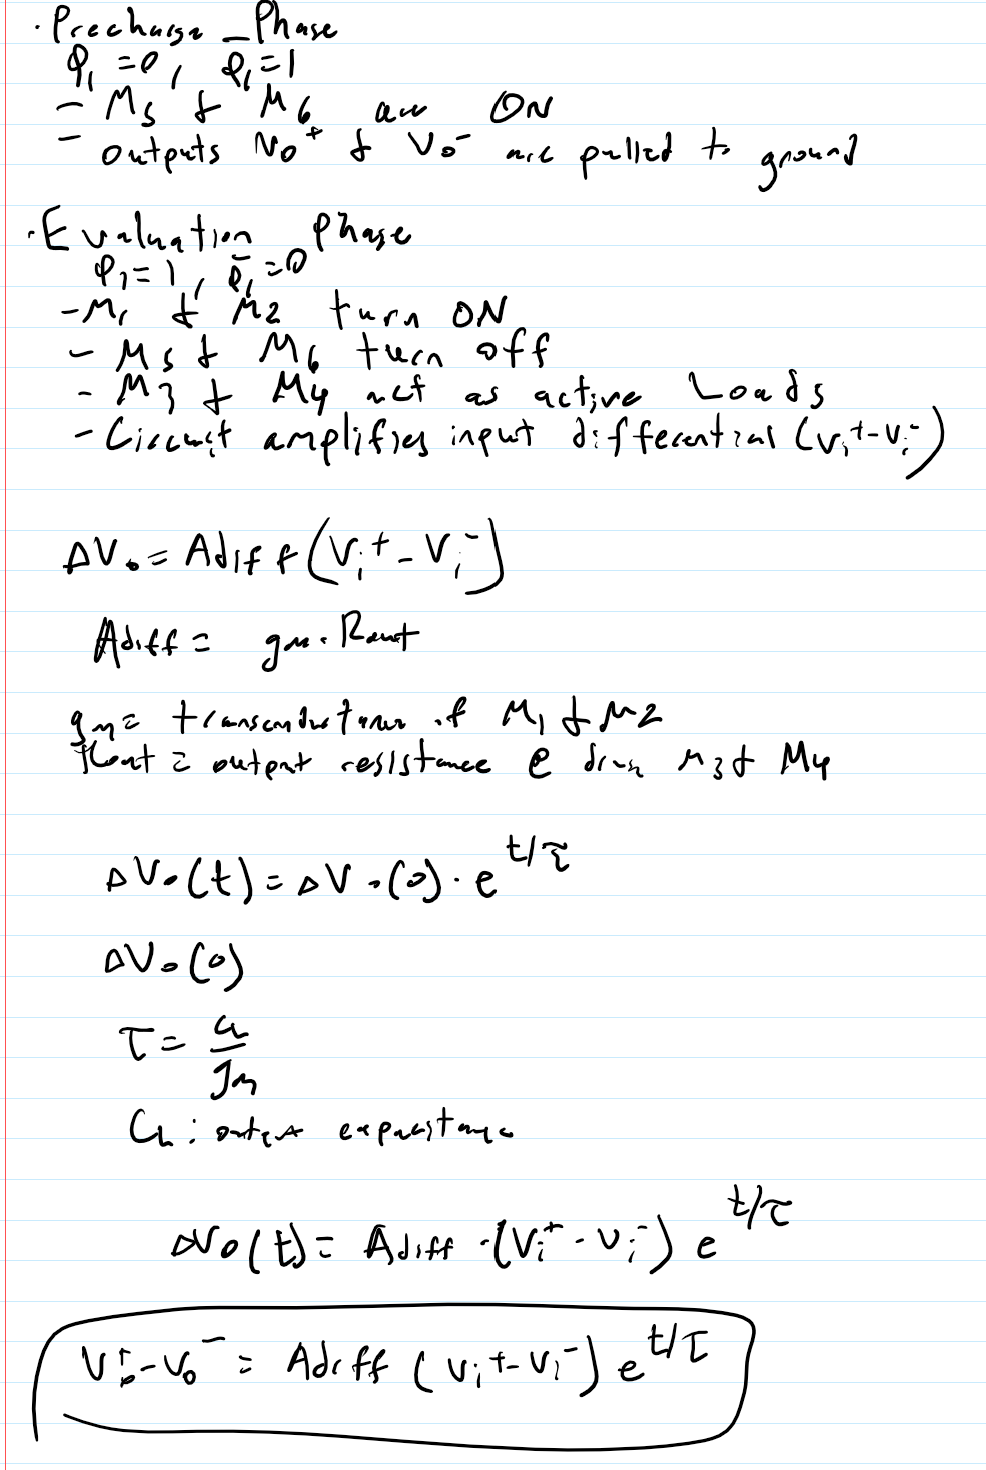

c. Explain the advantages and disadvantages between dynamic and static latches?

Dynamic latches are faster and smaller but are more volatile and sensitive to leakage

Static latches are more robust, reatin data indefinitely (with power), but are bigger and consume more power

d. Is this latch a static, dynamic or a semi-dynamic latch? Why?

This is a dynamic latch because it needs a clock to refresh, holds data dynamically using node capacitance, and does not consume static power but is sensitve to leakage and time.

# AD2 Related Work

1. Build a simple comparator by using an OPAMP as shown below in the figure below. Passing a
sine wave with frequency of 100KHz through the comparator and check out the output signal.

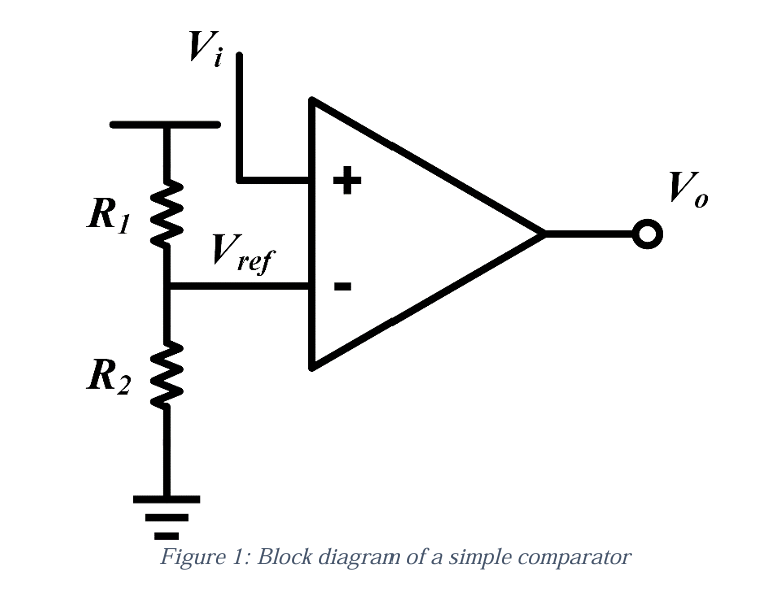

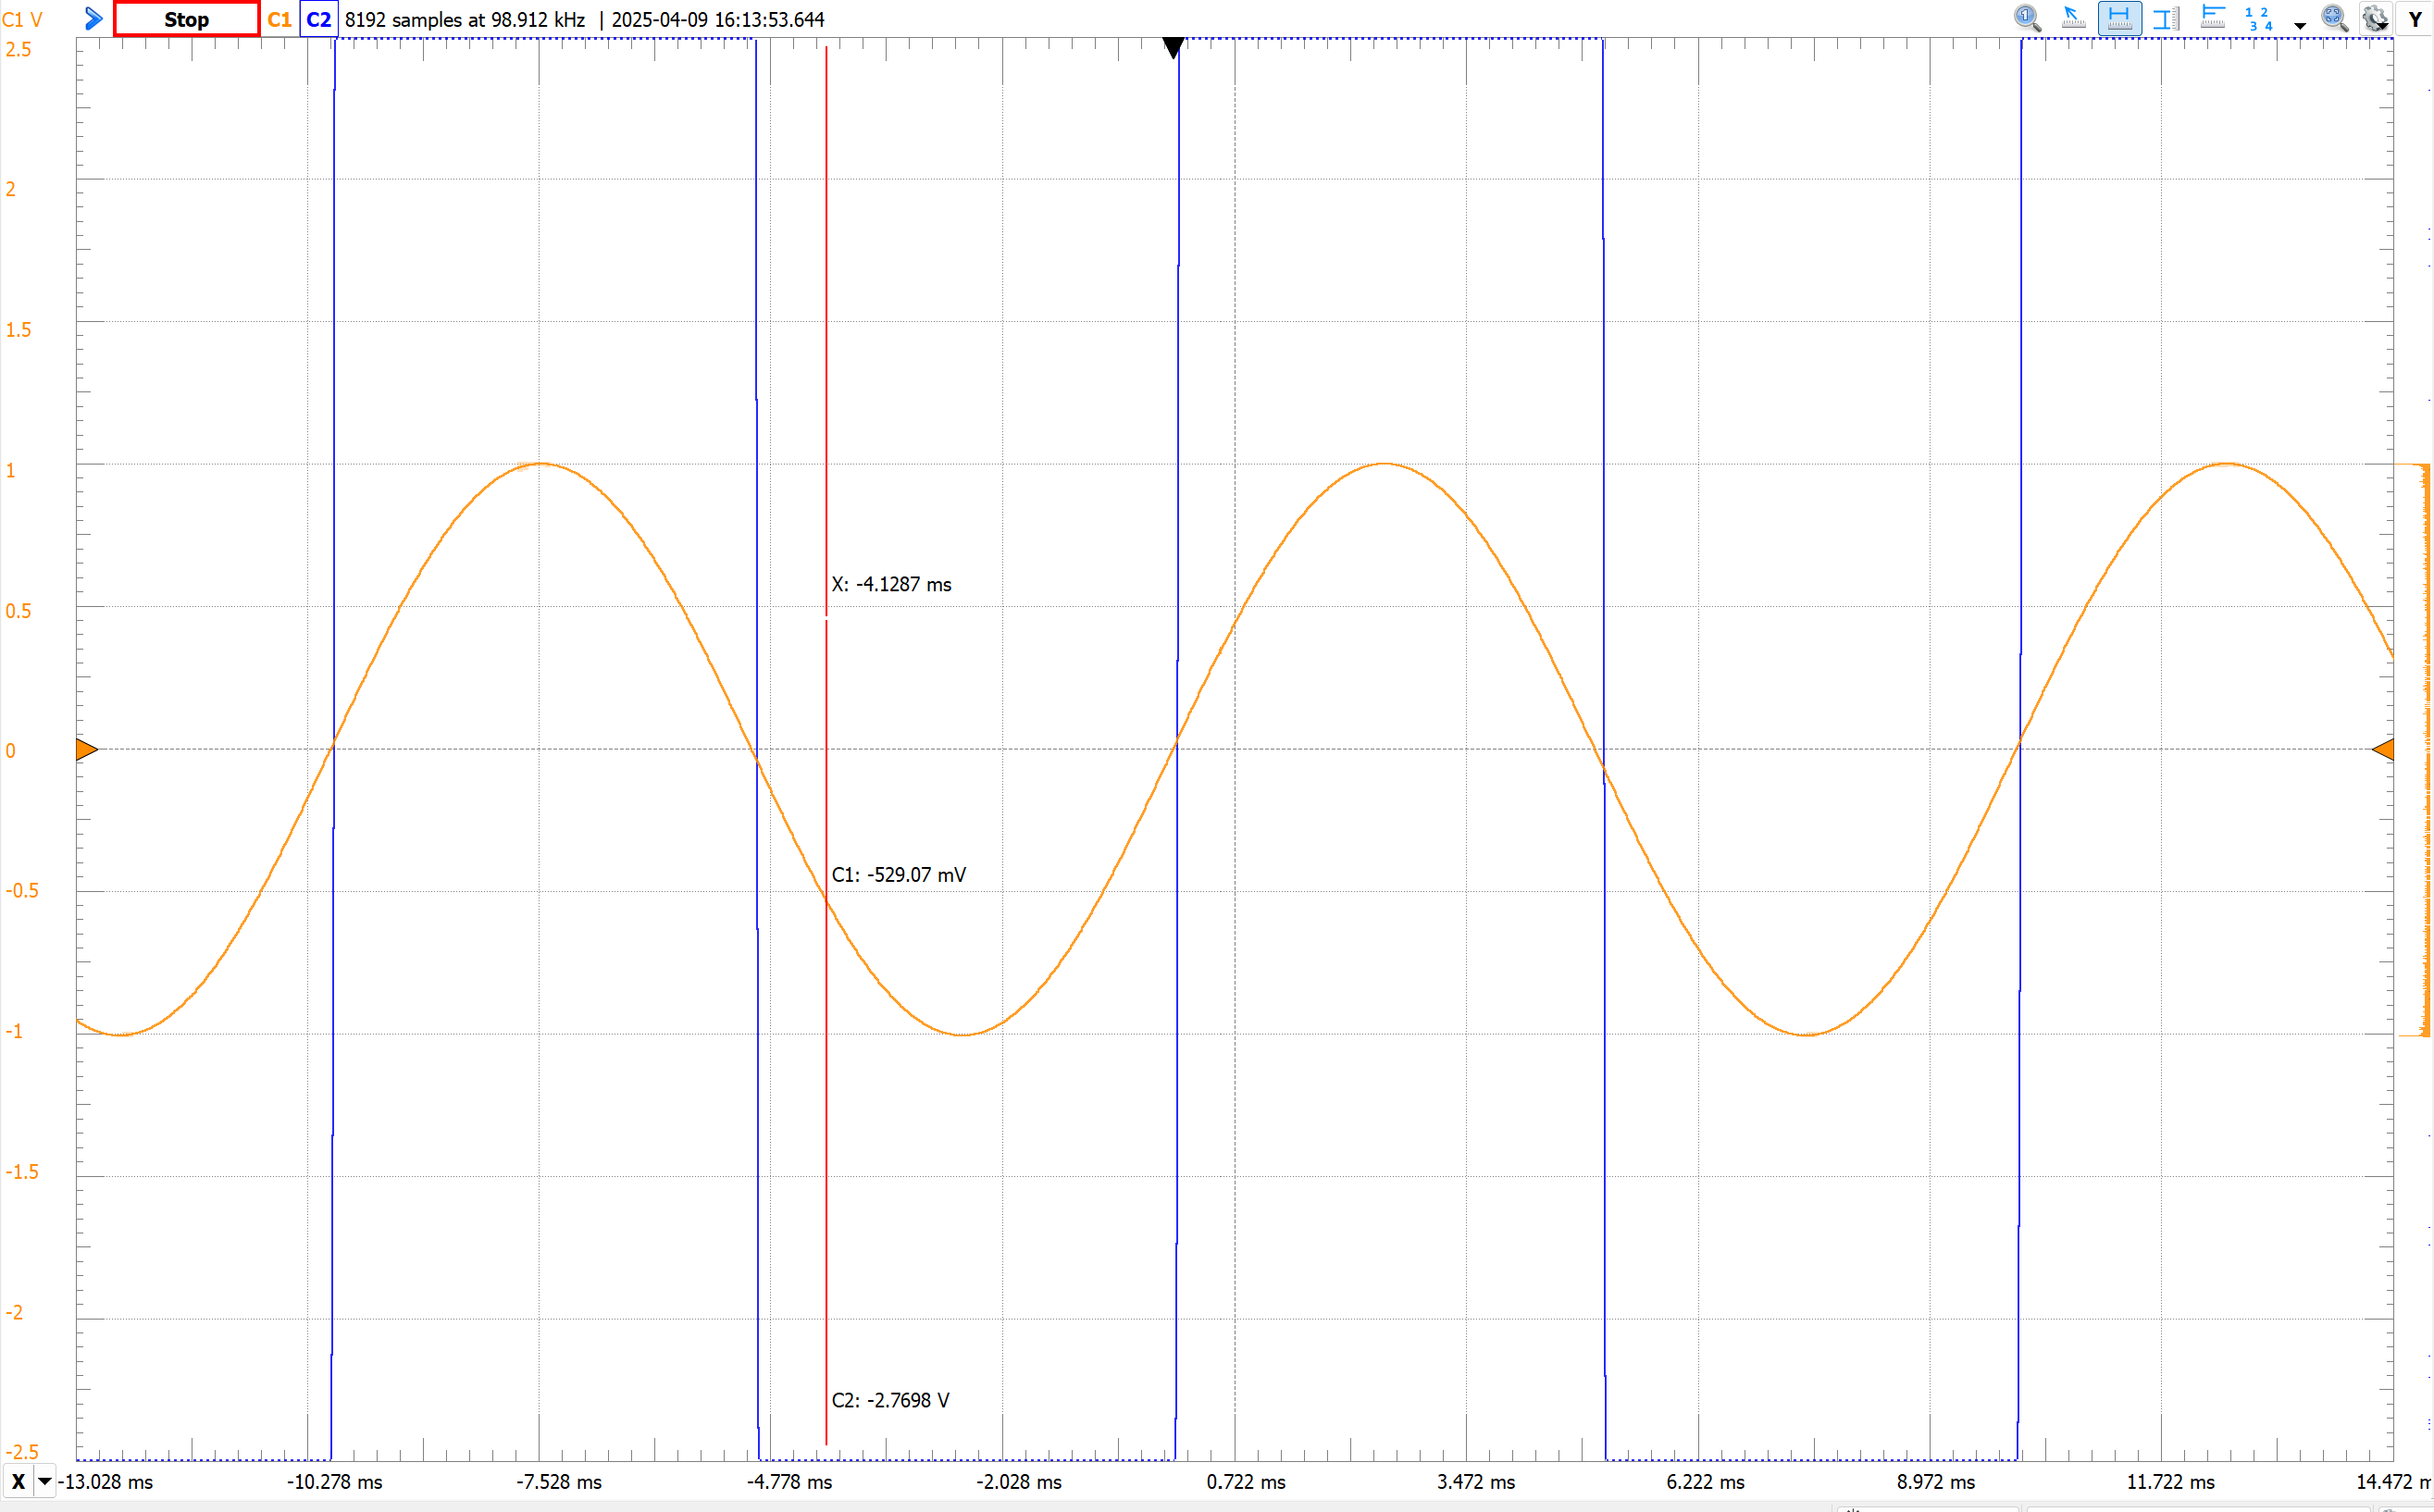

Graph of output of comparator

2. Build a 3-bit Flash ADC with LSB of 100mV consisted of reference ladder and multiple
comparators as shown below.

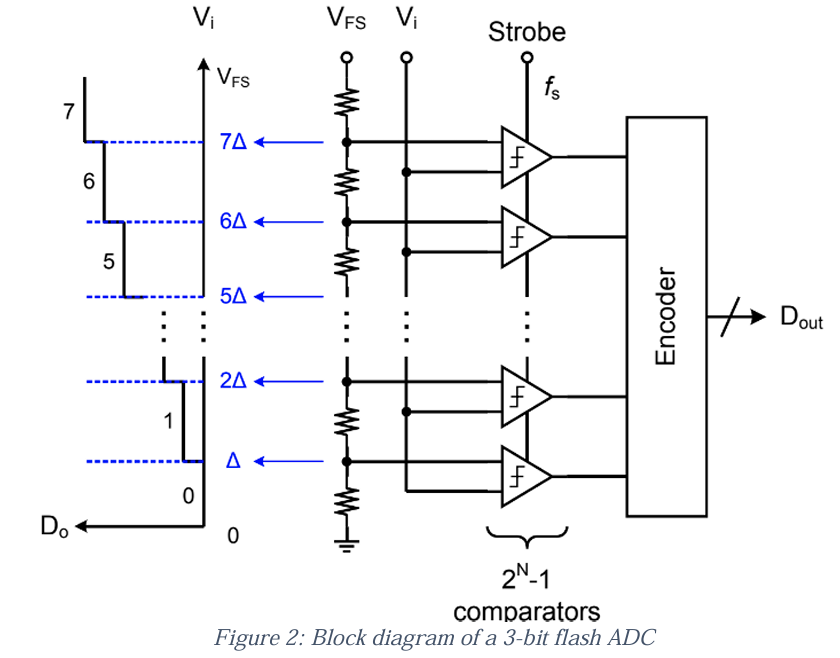

3. Using the logic analyzer (referring to this link: https://digilent.com/reference/test-and
measurement/guides/waveforms-logic-analyzer) of AD2 to capture the digital bits from the
output of the comparators.

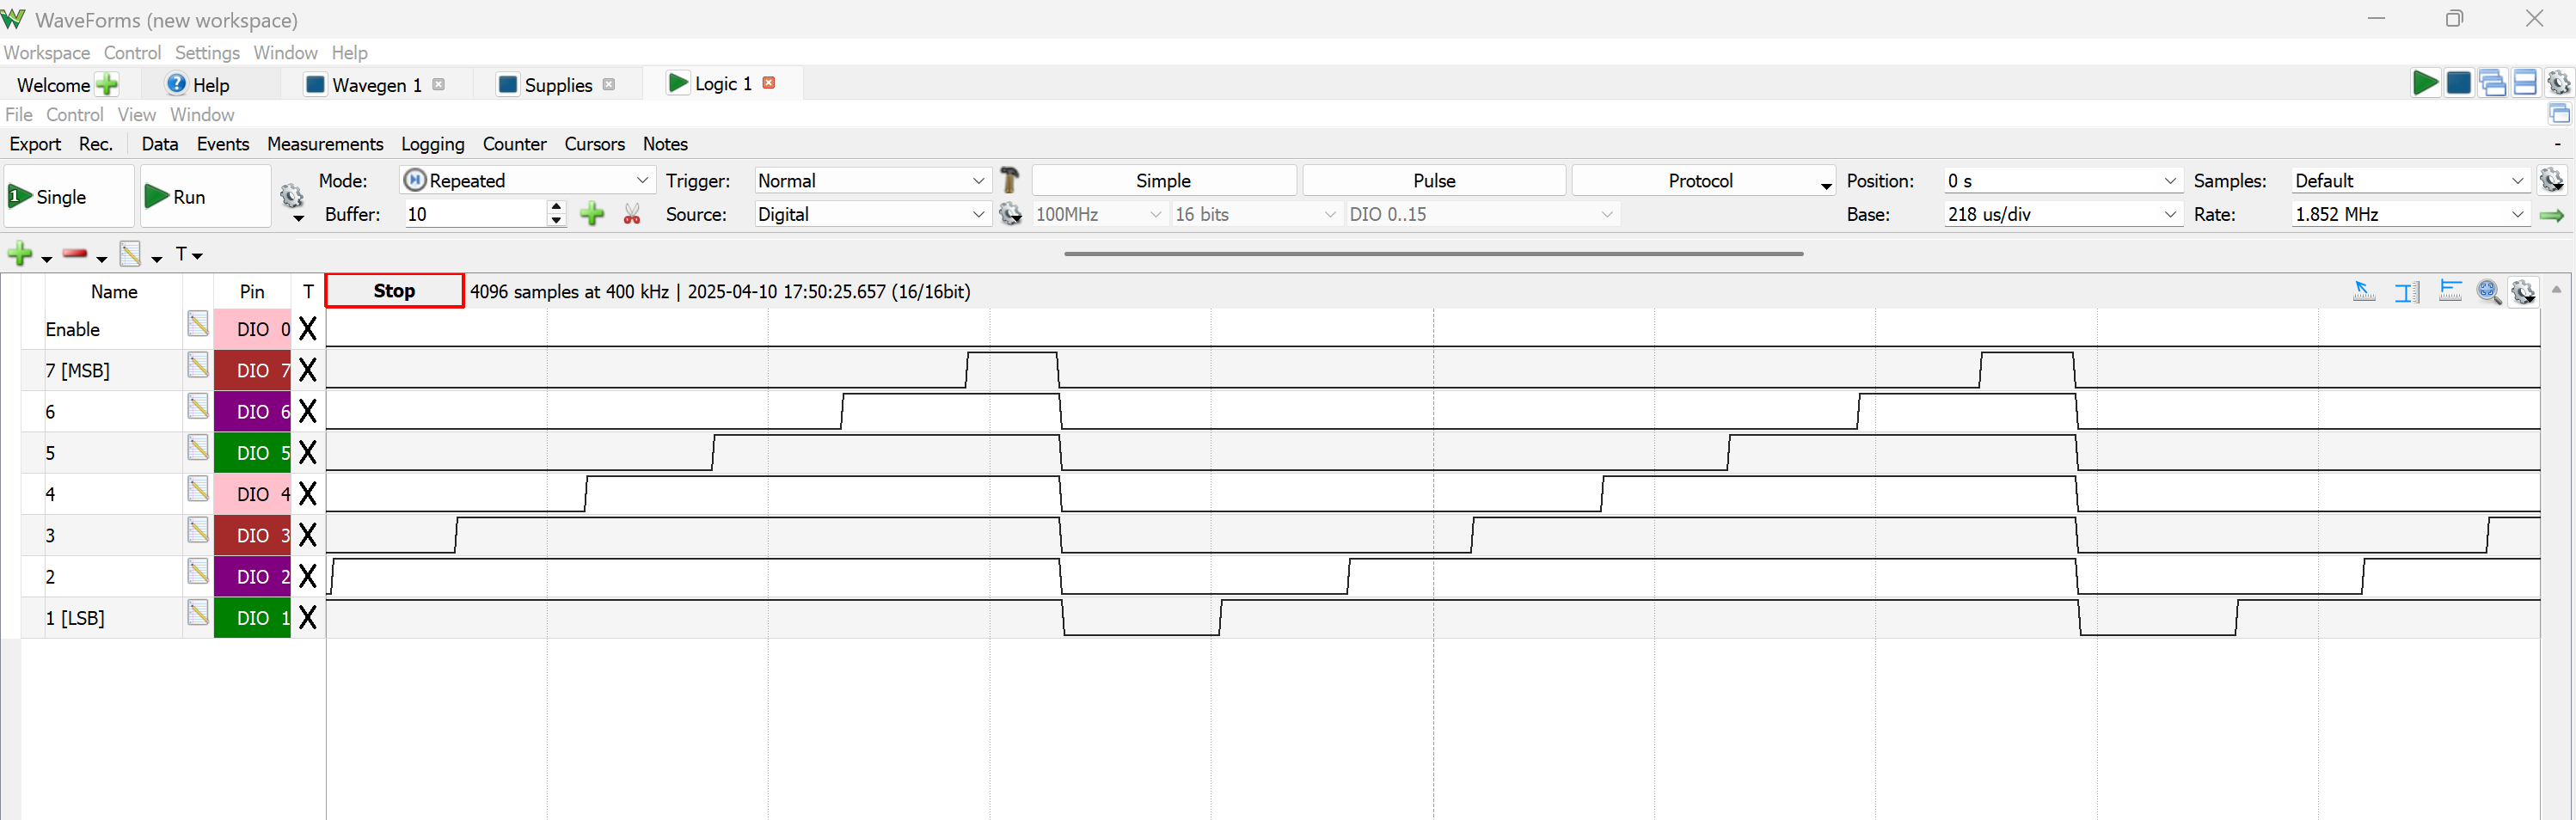

Graph of output of 3-bit flash ADC

4. Obtain and plot the transfer function of the ADC. Measure the offset error, full-scale error,
linear gain error, and the DNL and INL of your flash ADC.

In [64]:
expected_output = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
actual_output = [0.087, 0.174, 0.262, 0.349, 0.437, 0.522, 0.612]


N = 3 # Number of bits
LSB = 0.7 / 2**N
print("The LSB is ", LSB)

The LSB is  0.0875


In [65]:
ideal_first_transition = LSB * 0.5
offset_error = actual_output[0] - ideal_first_transition
print("The offset error is ", offset_error)

The offset error is  0.04325


In [66]:
ideal_last_transition = LSB * ((2**N) - 1 - 0.5)
full_scale_error = actual_output[-1] - ideal_last_transition
print("The full scale error is ", full_scale_error)

The full scale error is  0.04325000000000001


In [67]:
linear_gain_error = []
for i in range(len(actual_output)):
    linear_gain_error.append(((actual_output[i] - expected_output[i]) / expected_output[i])*100)

for i in range(len(linear_gain_error)):
      print("The linear gain error for bit ", i+1, " is ", linear_gain_error[i], "%")

The linear gain error for bit  1  is  -13.00000000000001 %
The linear gain error for bit  2  is  -13.00000000000001 %
The linear gain error for bit  3  is  -12.666666666666659 %
The linear gain error for bit  4  is  -12.75000000000001 %
The linear gain error for bit  5  is  -12.6 %
The linear gain error for bit  6  is  -12.999999999999995 %
The linear gain error for bit  7  is  -12.571428571428566 %


In [68]:
#Calculating DNL
ideal_step_size = (0.7 - 0.1) / (8 - 1)
DNL = []
for i in range(len(actual_output)-1):
    DNL.append(((actual_output[i+1] - actual_output[i]) / ideal_step_size) - 1)

for i in range(len(DNL)):
      print("The DNL for bit ", i+1, " is ", DNL[i])

The DNL for bit  1  is  0.014999999999999902
The DNL for bit  2  is  0.02666666666666684
The DNL for bit  3  is  0.01499999999999968
The DNL for bit  4  is  0.02666666666666684
The DNL for bit  5  is  -0.008333333333333082
The DNL for bit  6  is  0.0499999999999996


In [69]:
INL = [0] * len(DNL)
for i in range(len(DNL)):
  for j in range(len(DNL)):
    INL[i] += DNL[j]
    if i == j:
      break

for i in range(len(INL)):
      print("The INL for bit ", i+1, " is ", INL[i])

The INL for bit  1  is  0.014999999999999902
The INL for bit  2  is  0.04166666666666674
The INL for bit  3  is  0.05666666666666642
The INL for bit  4  is  0.08333333333333326
The INL for bit  5  is  0.07500000000000018
The INL for bit  6  is  0.12499999999999978


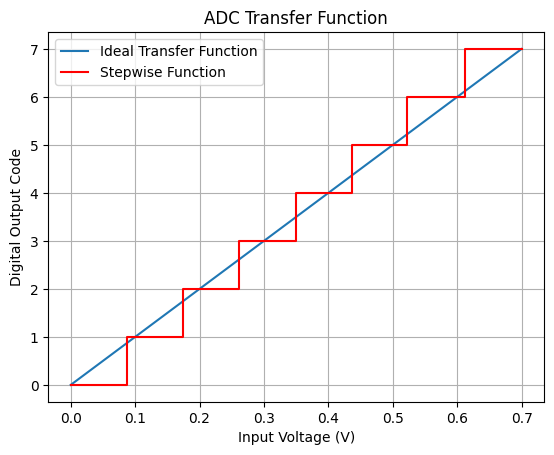

In [70]:
# ADC parameters
N = 3  # Number of bits
Vpp = 0.7  # Peak-to-peak voltage

# Generate input voltage range
Vin = np.linspace(0, Vpp, 1000)
actual_output = [0, 0.087, 0.174, 0.262, 0.349, 0.437, 0.522, 0.612, 0.612, 0.7]

# Shift actual_output values by 0.1 to the right

# Calculate the corresponding digital output codes
Dout = np.linspace(0, 7, 1000)
Dout_actual = [0, 1, 2, 3, 4, 5, 6, 7, 7, 7]

# Plot the transfer function
plt.plot(Vin, Dout, linewidth=1.5)  # Use plot for the ideal transfer function
plt.step(actual_output, Dout_actual, where='post', linewidth=1.5, color = 'red')  # Use step for stepwise function

plt.xlabel("Input Voltage (V)")
plt.ylabel("Digital Output Code")
plt.title("ADC Transfer Function")
plt.grid()
plt.legend(["Ideal Transfer Function", "Stepwise Function"])
plt.show()